# example of entire workflow QISKIT

workflow:
1. import packages
2. initializing var
3. add gates
4. visualizing the ckt
5. simulate the experiment
6. visualize the result

In [40]:

# QuantumCircuit: can be thought as the instructions of the quantum system. It holds all your quantum operations.

# QasmSimulator: is the Aer high performance circuit simulator.

# plot_histogram: creates histograms.
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

In [41]:
# initalize var
# here intialize with 2 quibits in the zero state with 2 classical bits to zero
circuit=QuantumCircuit(2,2)

In [42]:
circuit.h(0)
circuit.cx(0,1)
circuit.measure([0,1],[0,1])
# QuantumCircuit.h(0): A Hadamard gate H on qubit 0, which puts it into a superposition state.

# QuantumCircuit.cx(0, 1): A controlled-Not operation (CNOT) on control qubit 0 and target qubit 1, putting the qubits in an entangled state.

# QuantumCircuit.measure([0,1], [0,1]): if you pass the entire quantum and classical registers to measure, the ith qubit’s measurement result will be stored in the ith classical bit.
circuit.draw()
# or you could use 
# qiskit.circuit.QuantumCircuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In this circuit, the qubits are ordered with qubit zero at the top and qubit one at the bottom. The circuit is read left-to-right, meaning that gates which are applied earlier in the circuit show up farther to the left.

The default backend for QuantumCircuit.draw() or qiskit.visualization.circuit_drawer() is the text backend. However, depending on your local environment you may want to change these defaults to something better suited for your use case. This is done with the user config file. By default the user config file should be located in ~/.qiskit/settings.conf and is a .ini file.

For example, a settings.conf file for setting a Matplotlib drawer is:

    [default]
    circuit_drawer = mpl
You can use any of the valid circuit drawer backends as the value for this config, this includes text, mpl, latex, and latex_source.

In [43]:
simulator = QasmSimulator()
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)


Total count for 00 and 11 are: {'11': 505, '00': 495}


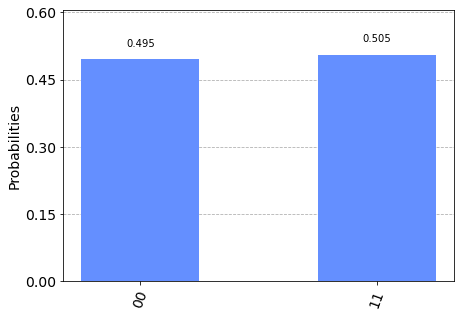

In [44]:
plot_histogram(counts)